<a href="https://colab.research.google.com/github/Mades1711/desafio_5-e-commerce_RFM/blob/main/desafio_5_e_commerce_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Contexto
Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de
recência, frequência e ticket médio (RFM) dos seus clientes.

A saber RFM:
* R (Recency): Tempo que o cliente realizou a última compra (em dias)
* F (Frequency): Quantidade de compras realizadas pelo cliente
* M (Monetary): Valor do ticket médio gasto pelo cliente

Onde ticket médio = média do total gasto por pedido para cada cliente.
Para isso, vocês receberam uma base de dados (arquivo csv) e devem construir um
código em Python que gera um output também csv, porém contendo apenas a
identificação do cliente e métricas RFM.

## Libraries

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta



from sklearn.preprocessing import scale, minmax_scale, power_transform

## Load data

In [ ]:
from google.colab import files
upload = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv("data.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# **Valores nulos**

In [ ]:
df.isna().sum() # verififcando se possui valores nulos

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Tratamento de quantidade e preço

Removendo preços unitarios e quantidades de produtos iguais ou inferior a 0

In [ ]:
df[df['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [ ]:
df = df[df['UnitPrice']>0]

In [ ]:
df.query('Quantity<0 | Quantity.isnull()')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
df = df.query('Quantity>0 & Quantity.notnull()')

In [ ]:
df.query('Quantity<0 & Quantity.isnull()')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# **Valores duplicados**
Verificando se possui valores duplicados

In [ ]:
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
df = df.drop_duplicates()

In [ ]:
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# **Tipos de dados**

In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
#Corrigindo os tipos de dados das colunas CustomerID e InvoiceDate
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = (pd.to_datetime(df['InvoiceDate'])).dt.date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

# **Tratamento de outliers**

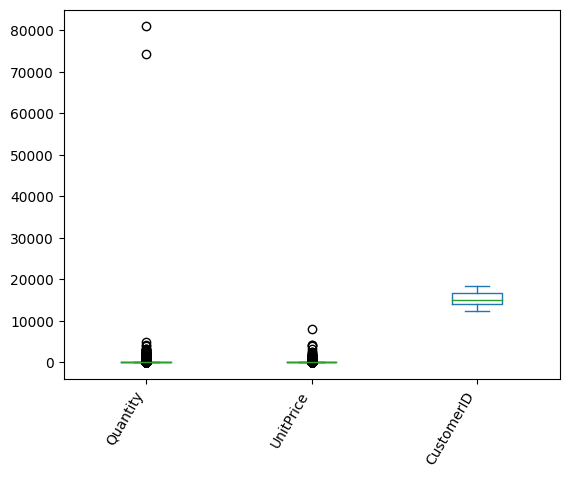

In [ ]:
df.plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
df = df[df['Quantity']<=10000]
df = df[df['UnitPrice']<5000]

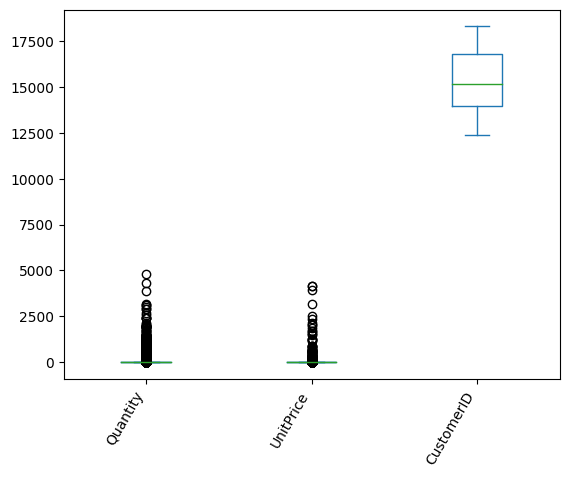

In [ ]:
df.plot.box()
plt.xticks(rotation=60, ha='right');

# **Inserindo colunas adicionais**

In [ ]:
df['Totalsale'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


In [ ]:
df['MaxDate'] = df['InvoiceDate'].max()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsale,MaxDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2011-12-09
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2011-12-09
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09


# **Plotando gráficos**

##Top 10 países com maior valor em vendas

In [ ]:
df_groupCountry = df.groupby(['Country'])[['Totalsale']].sum().reset_index().sort_values(by='Totalsale', ascending=False).head(10)
df_groupCountry

,Country,Totalsale
35,United Kingdom,7031228.694
23,Netherlands,285446.340
10,EIRE,265262.460
14,Germany,228678.400
13,France,208934.310
0,Australia,138453.810
30,Spain,61558.560
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38367.830


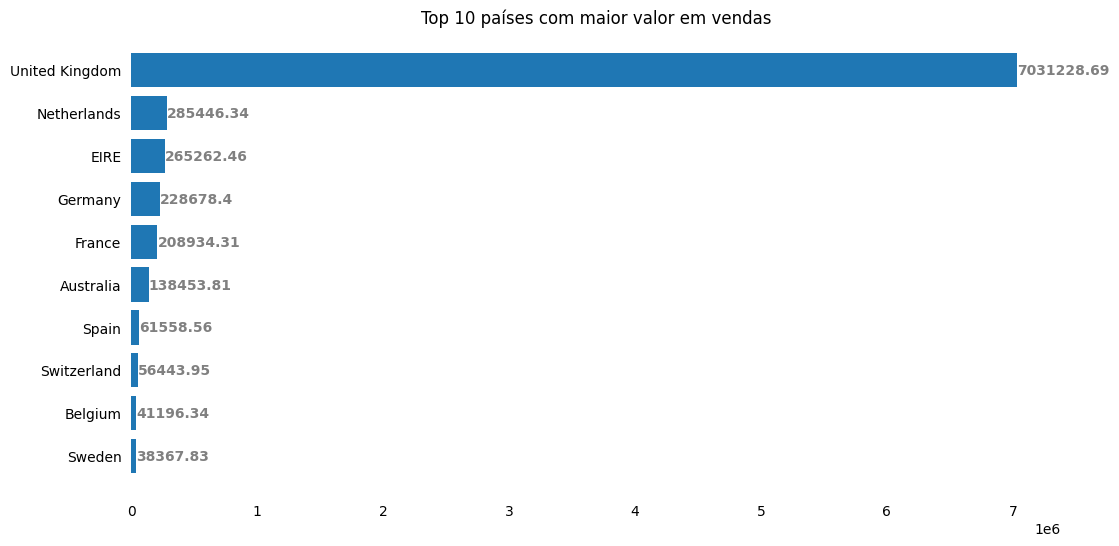

In [ ]:
country = df_groupCountry['Country']
totalsale = df_groupCountry['Totalsale']

fig, ax = plt.subplots(figsize =(12, 6))

ax.barh(country, totalsale)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Top 10 países com maior valor em vendas',
             loc ='center', )

# Show Plot
plt.show()


##Top 10 produtos mais vendidos

In [ ]:
df_groupStockCode = df.groupby(['StockCode'])[['Quantity']].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)
df_groupStockCode


,StockCode,Quantity
2803,84077,54319
1088,22197,49160
3218,85099B,46078
3232,85123A,36763
3058,84879,35263
423,21212,33670
1919,23084,27153
1352,22492,26076
1469,22616,25329
910,21977,24230


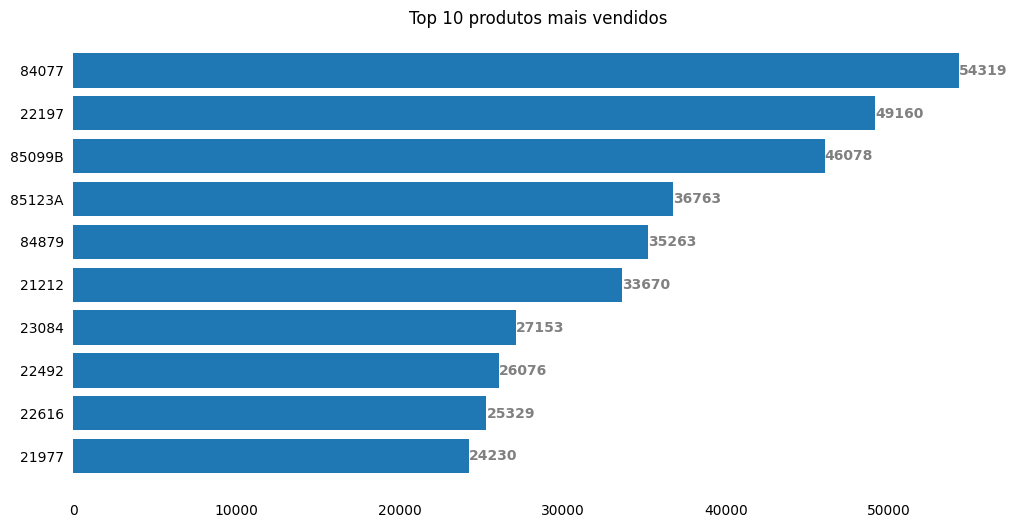

In [ ]:
StockCode = df_groupStockCode['StockCode']
Quantity = df_groupStockCode['Quantity']

fig, ax = plt.subplots(figsize =(12, 6))

ax.barh(StockCode, Quantity)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Top 10 produtos mais vendidos',
             loc ='center', )



# Show Plot
plt.show()

##Valor de venda total por mês

In [ ]:
df['month'] = pd.to_datetime(df['InvoiceDate'], format='%m').dt.month_name()
df['month_day'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsale,MaxDate,month,month_day,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2011-12-09,December,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09,December,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2011-12-09,December,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09,December,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09,December,12,2010


In [ ]:
df.year.unique()

array([2010, 2011])

In [ ]:
df_groupTotaMonth= df.groupby(['year','month','month_day'])[['Totalsale']].sum().sort_values(by=['year','month_day']).reset_index()
df_groupTotaMonth

,year,month,month_day,Totalsale
0,2010,December,12,570422.730
1,2011,January,1,490917.710
2,2011,February,2,446084.920
3,2011,March,3,594081.760
4,2011,April,4,468374.331
5,2011,May,5,669212.400
6,2011,June,6,660046.050
7,2011,July,7,598962.901
8,2011,August,8,644051.040
9,2011,September,9,950690.202


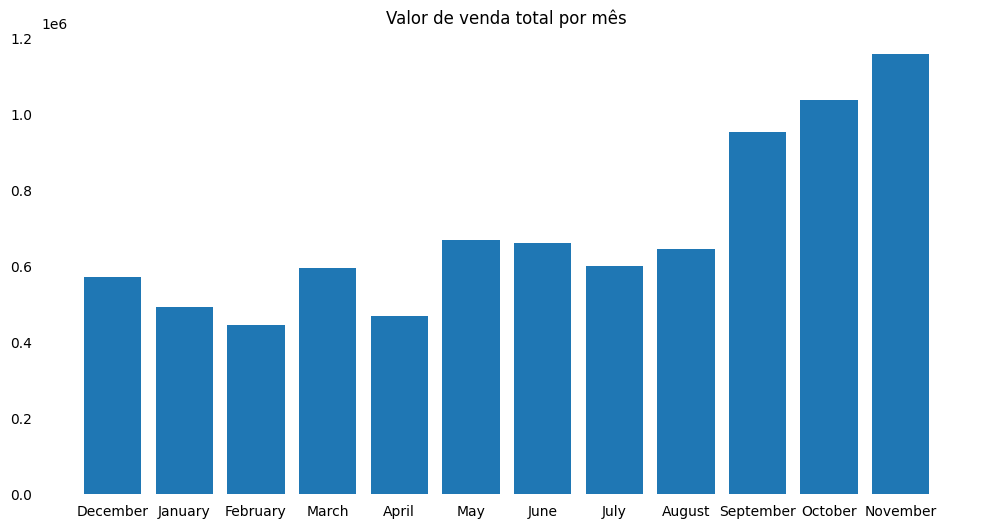

In [ ]:
month = df_groupTotaMonth['month']
monthTotalsale = df_groupTotaMonth['Totalsale']

fig, ax = plt.subplots(figsize =(12, 6))

ax.bar(month, monthTotalsale)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add Plot Title
ax.set_title('Valor de venda total por mês',
             loc ='center', )

# Show Plot
plt.show()

##Valor de venda total por mês e por país (considerando apenas os top 10):

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsale,MaxDate,month,month_day,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2011-12-09,December,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09,December,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2011-12-09,December,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09,December,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09,December,12,2010


In [ ]:
df_groupTotaMonthCountry= df.groupby(['year','month','Country'])[['Totalsale']].sum().sort_values(by='Totalsale', ascending=False).reset_index().head(10)
df_groupTotaMonthCountry['nameagr'] = df_groupTotaMonthCountry['year'].astype(str) +' ' + df_groupTotaMonthCountry['month'] + ' ' + df_groupTotaMonthCountry['Country']


In [ ]:
df_groupTotaMonthCountry

,year,month,Country,Totalsale,nameagr
0,2011,November,United Kingdom,975251.390,2011 November United Kingdom
1,2011,October,United Kingdom,821220.130,2011 October United Kingdom
2,2011,September,United Kingdom,794806.692,2011 September United Kingdom
3,2011,May,United Kingdom,542216.600,2011 May United Kingdom
4,2011,June,United Kingdom,523775.590,2011 June United Kingdom
5,2011,August,United Kingdom,497194.910,2011 August United Kingdom
6,2010,December,United Kingdom,496477.340,2010 December United Kingdom
7,2011,July,United Kingdom,484545.591,2011 July United Kingdom
8,2011,March,United Kingdom,465784.190,2011 March United Kingdom
9,2011,April,United Kingdom,408733.111,2011 April United Kingdom


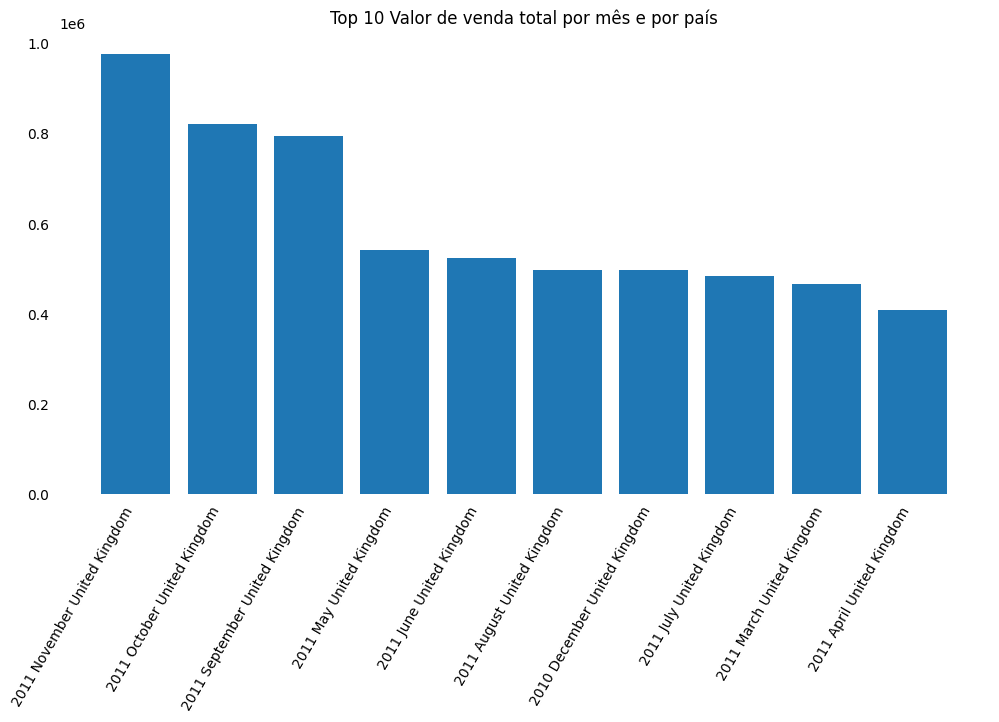

In [ ]:
nameagr = df_groupTotaMonthCountry['nameagr']
monthTotalsale = df_groupTotaMonthCountry['Totalsale']

fig, ax = plt.subplots(figsize =(12, 6))

ax.bar(nameagr, monthTotalsale)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add Plot Title
ax.set_title('Top 10 Valor de venda total por mês e por país',
             loc ='center', )

plt.xticks(rotation=60, ha='right');

# Show Plot
plt.show()

#Cálculo do RFM

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsale,MaxDate,month,month_day,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2011-12-09,December,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09,December,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2011-12-09,December,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09,December,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09,December,12,2010


In [ ]:
df_RFM = df.groupby(['CustomerID','InvoiceNo','InvoiceDate','MaxDate'])[['Totalsale']].sum().reset_index()
df_RFM.head()

,CustomerID,InvoiceNo,InvoiceDate,MaxDate,Totalsale
0,12347,537626,2010-12-07,2011-12-09,711.79
1,12347,542237,2011-01-26,2011-12-09,475.39
2,12347,549222,2011-04-07,2011-12-09,636.25
3,12347,556201,2011-06-09,2011-12-09,382.52
4,12347,562032,2011-08-02,2011-12-09,584.91


In [ ]:
df_RFM = df_RFM.groupby(['CustomerID']).agg({
    'InvoiceNo' :'count', #quantidade de compras
    'InvoiceDate' : 'max',
    'MaxDate' : 'max',
    'Totalsale': 'mean' #ticket médio
    }).reset_index()

In [ ]:
#recência
df_RFM['R'] = (df_RFM['MaxDate'] - df_RFM['InvoiceDate']) / np.timedelta64(1, 'D')

In [ ]:
df_RFM= df_RFM.rename(columns = {'InvoiceNo': 'F', 'Totalsale' : 'M'})
df_RFM= df_RFM.drop(columns = {'InvoiceDate','MaxDate'})
df_RFM['M'] = df_RFM['M'].round()

In [ ]:
df_RFM = df_RFM[['CustomerID','R','F','M']]

#Geração CSV

In [ ]:
df_RFM.to_csv('e-commerce_RFM.csv', index=False)